<a href="https://colab.research.google.com/github/franzzfher/kueski/blob/main/kueski_script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Imports complete! Ready to load data.
DATA LOADED SUCCESSFULLY
int_loans_enriched:           9,396 rows × 43 cols
fct_vintage_performance:      3 rows × 33 cols
fct_risk_segment_performance: 8 rows × 28 cols
dim_loans:                    9,396 rows × 42 cols

KEY PORTFOLIO METRICS
Total Loans Disbursed:     9,396
Total Amount Funded:       $10,615,178.60
Total Revenue:             $1,576,262.27
Total Charge-offs:         $1,998,553.08
Net Margin:                $-1,285,834.41 (-12.11%)
Weighted Avg Loss Rate:    18.83%


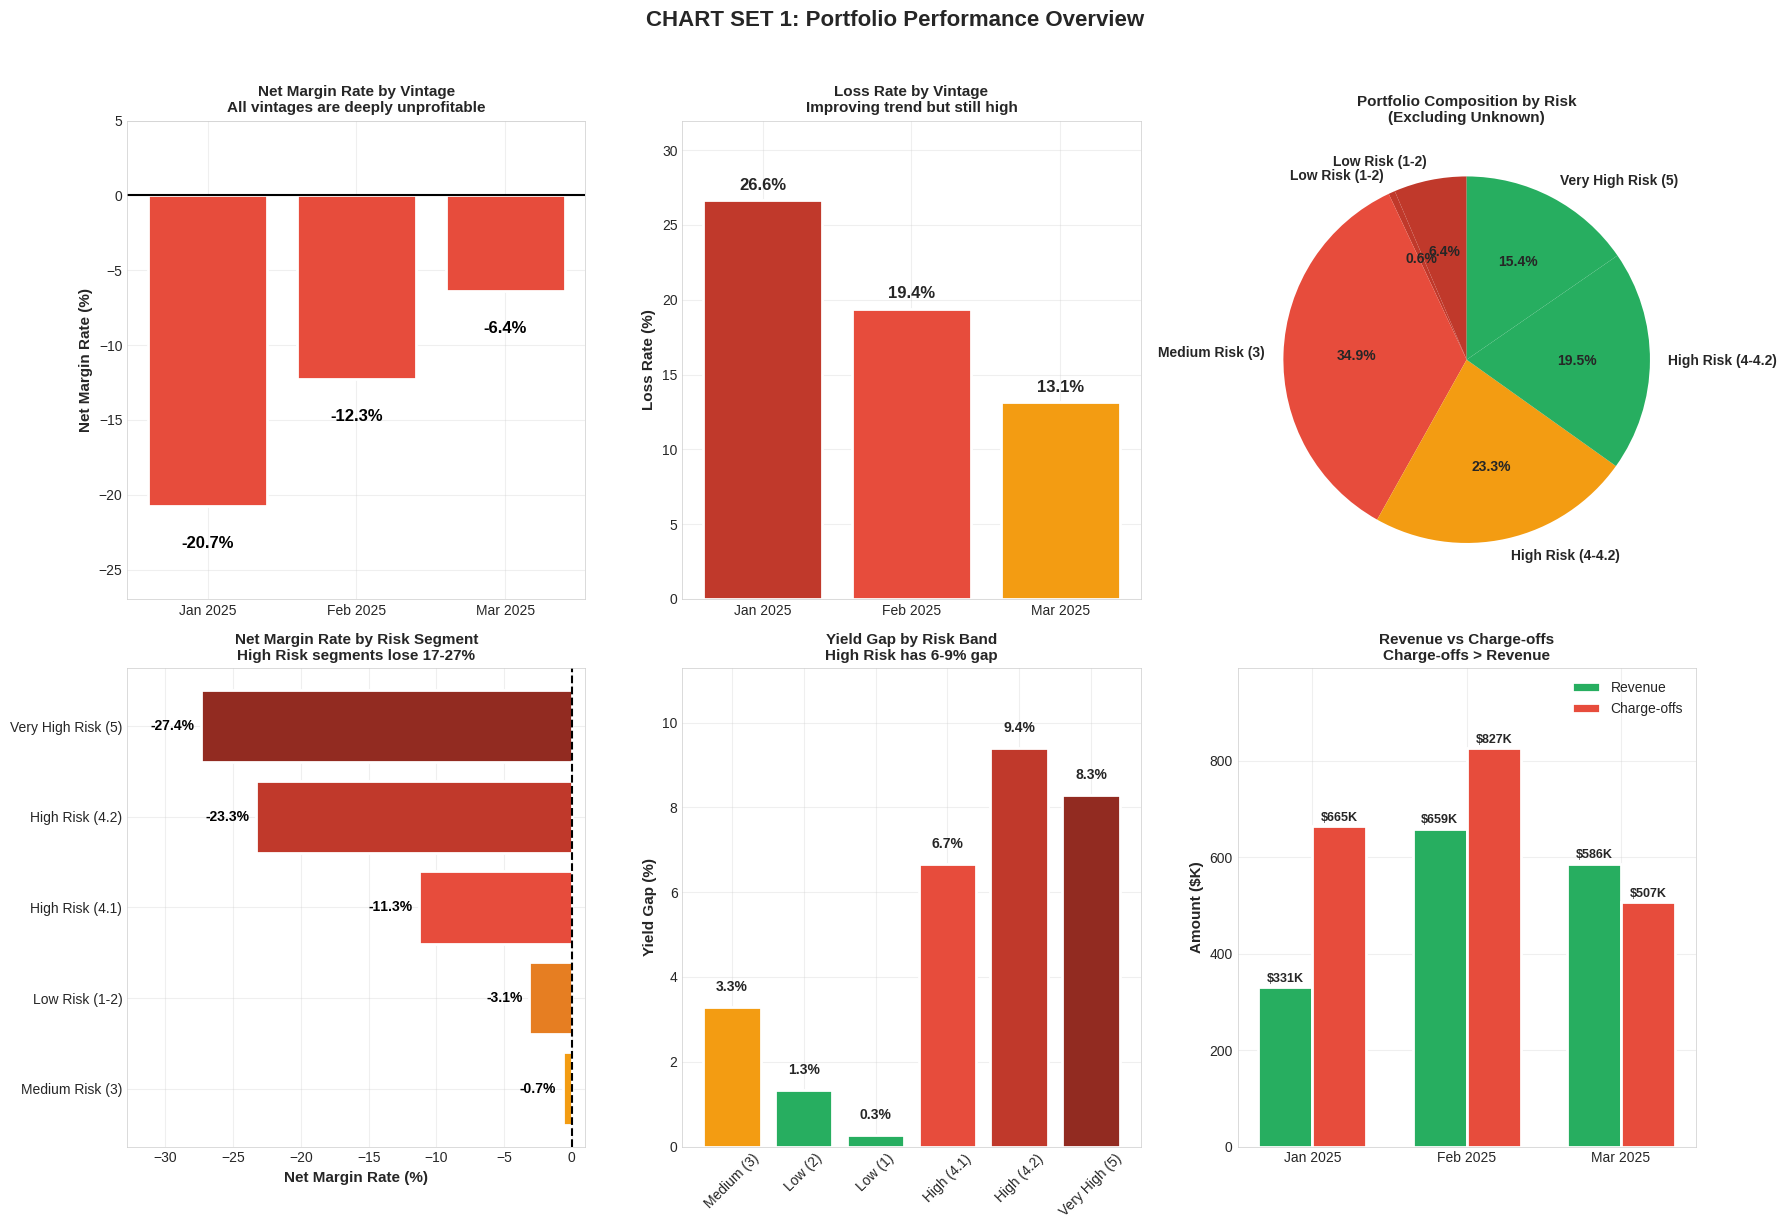


✅ Chart Set 1 saved: kueski_chart1_portfolio_overview.png


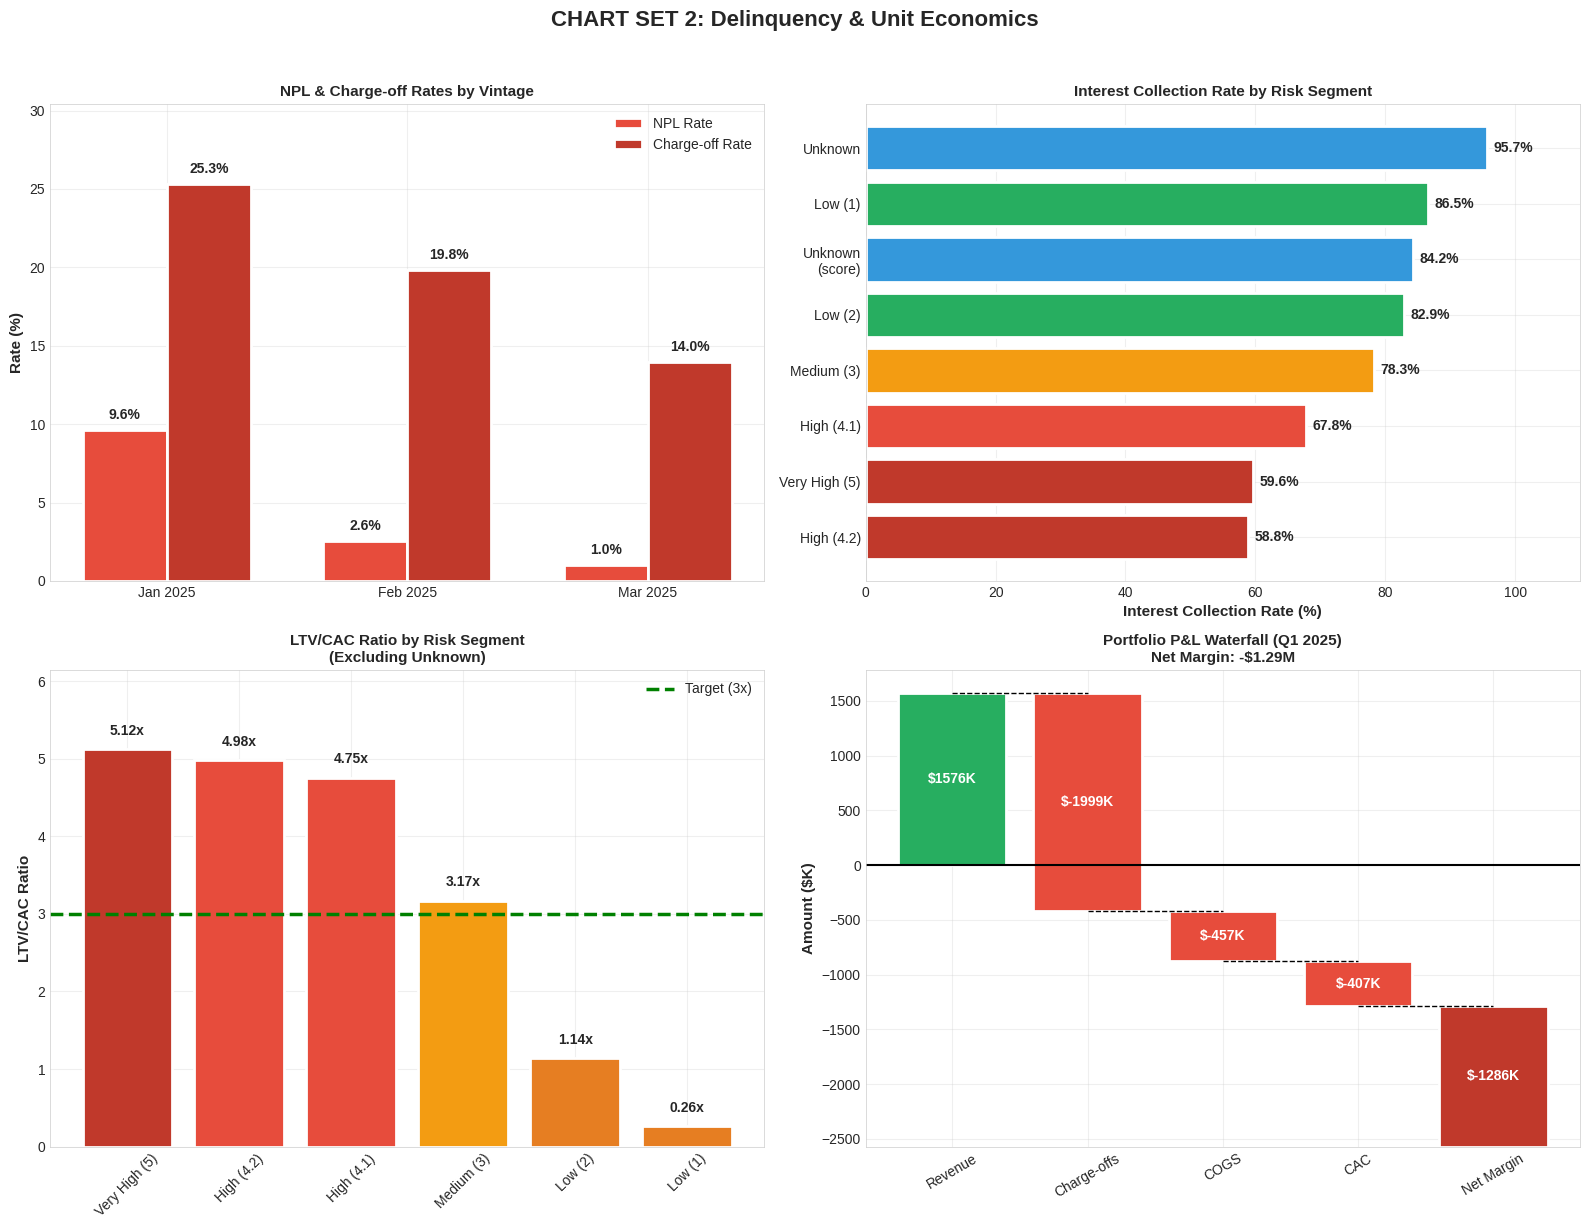


✅ Chart Set 2 saved: kueski_chart2_delinquency_analysis.png


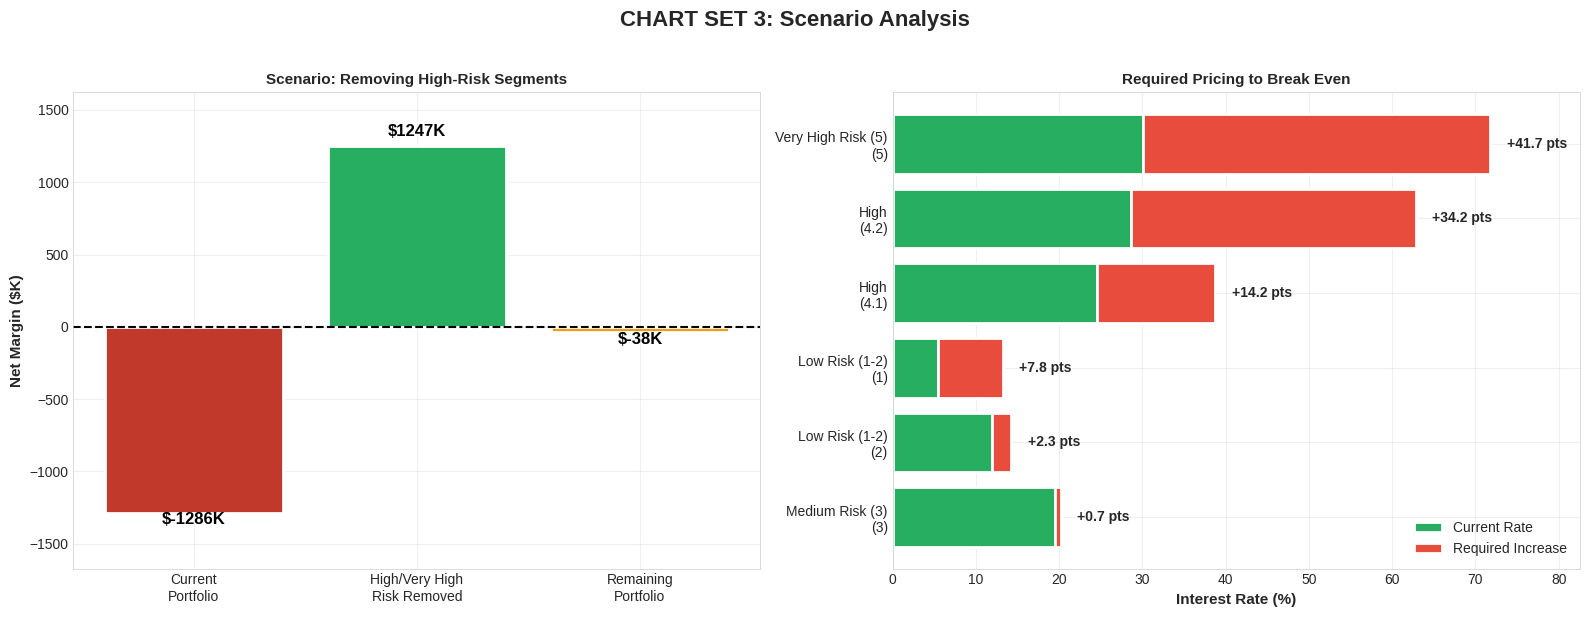


✅ Chart Set 3 saved: kueski_chart3_scenario_analysis.png

SUMMARY TABLES FOR REFERENCE
vintage_month  loan_count total_funded loss_rate net_margin_rate
      2025-01        2140   $2,494,644     26.6%          -20.7%
      2025-02        3694   $4,260,464     19.4%          -12.3%
      2025-03        3562   $3,860,070     13.1%           -6.4%

✅ ALL VISUALIZATIONS COMPLETE!

📁 Files saved:
   1. kueski_chart1_portfolio_overview.png
   2. kueski_chart2_delinquency_analysis.png
   3. kueski_chart3_scenario_analysis.png

📋 EXECUTIVE RECOMMENDATION:
   SUSPEND Risk Band 5, REDUCE Risk Band 4.2, INCREASE pricing for Risk 4.1
   Expected improvement: +$800K to +$1M annually


In [7]:
# ╔══════════════════════════════════════════════════════════════════════════════╗
# ║           KUESKI PAY PORTFOLIO ANALYSIS - GOOGLE COLAB NOTEBOOK             ║
# ║                              Q1 2025 Vintages                                ║
# ╚══════════════════════════════════════════════════════════════════════════════╝

# ═══════════════════════════════════════════════════════════════════════════════
# CELL 1: IMPORTS
# ═══════════════════════════════════════════════════════════════════════════════
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = '#cccccc'
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['font.size'] = 10

print("✅ Imports complete! Ready to load data.")

# ═══════════════════════════════════════════════════════════════════════════════
# CELL 2: LOAD DATA
# ═══════════════════════════════════════════════════════════════════════════════
try:
    int_loans = pd.read_csv('int_loans_enriched.csv')
    vintage_perf = pd.read_csv('fct_vintage_performance.csv')
    risk_perf = pd.read_csv('fct_risk_segment_performance.csv')
    dim_loans = pd.read_csv('dim_loans.csv')

    print("=" * 60)
    print("DATA LOADED SUCCESSFULLY")
    print("=" * 60)
    print(f"int_loans_enriched:           {int_loans.shape[0]:,} rows × {int_loans.shape[1]} cols")
    print(f"fct_vintage_performance:      {vintage_perf.shape[0]:,} rows × {vintage_perf.shape[1]} cols")
    print(f"fct_risk_segment_performance: {risk_perf.shape[0]:,} rows × {risk_perf.shape[1]} cols")
    print(f"dim_loans:                    {dim_loans.shape[0]:,} rows × {dim_loans.shape[1]} cols")

except FileNotFoundError as e:
    print("❌ ERROR: File not found.")
    print(f"Details: {e}")
    print("Please upload the CSV files to the Colab 'Files' tab on the left.")

# ═══════════════════════════════════════════════════════════════════════════════
# CELL 3: PREPARE SUMMARY DATA
# ═══════════════════════════════════════════════════════════════════════════════
vintage_summary = vintage_perf.copy()
vintage_summary['vintage_month'] = pd.to_datetime(vintage_summary['vintage_month']).dt.strftime('%Y-%m')
vintage_summary = vintage_summary.sort_values('vintage_month')

risk_summary = risk_perf.copy()

total_loans = vintage_summary['loan_count'].sum()
total_funded = vintage_summary['total_funded'].sum()
total_net_margin = vintage_summary['total_net_margin'].sum()
total_revenue = vintage_summary['total_revenue'].sum()
total_chargeoffs = vintage_summary['total_charge_off'].sum()
total_cogs = vintage_summary['total_cogs'].sum()
total_cac = vintage_summary['total_cac'].sum()

print("\n" + "=" * 60)
print("KEY PORTFOLIO METRICS")
print("=" * 60)
print(f"Total Loans Disbursed:     {total_loans:,}")
print(f"Total Amount Funded:       ${total_funded:,.2f}")
print(f"Total Revenue:             ${total_revenue:,.2f}")
print(f"Total Charge-offs:         ${total_chargeoffs:,.2f}")
print(f"Net Margin:                ${total_net_margin:,.2f} ({(total_net_margin/total_funded)*100:.2f}%)")
print(f"Weighted Avg Loss Rate:    {(total_chargeoffs/total_funded)*100:.2f}%")

# ═══════════════════════════════════════════════════════════════════════════════
# ╔══════════════════════════════════════════════════════════════════════════════╗
# ║                    CHART SET 1: PORTFOLIO PERFORMANCE                        ║
# ╚══════════════════════════════════════════════════════════════════════════════╝

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('CHART SET 1: Portfolio Performance Overview', fontsize=16, fontweight='bold', y=1.02)

# ───────────────────────────────────────────────────────────────────────────────
# CHART 1.1: Net Margin Rate by Vintage (Adjusted to %)
# ───────────────────────────────────────────────────────────────────────────────
ax1 = axes[0, 0]
vintage_months = ['Jan 2025', 'Feb 2025', 'Mar 2025']

# Use calculated rates if available, else standard fallback
if len(vintage_summary) >= 3:
    net_margin_rates = vintage_summary['net_margin_rate'].values
else:
    net_margin_rates = [0, 0, 0]

bars1 = ax1.bar(vintage_months, net_margin_rates, color=['#e74c3c', '#e74c3c', '#e74c3c'], edgecolor='white', linewidth=2)
ax1.axhline(y=0, color='black', linestyle='-', linewidth=1.5)
ax1.set_ylabel('Net Margin Rate (%)', fontsize=11, fontweight='bold')
ax1.set_title('Net Margin Rate by Vintage\nAll vintages are deeply unprofitable', fontsize=11, fontweight='bold')

for bar, val in zip(bars1, net_margin_rates):
    y_pos = bar.get_height() - 2 if val < 0 else bar.get_height() + 2
    ax1.text(bar.get_x() + bar.get_width()/2, y_pos,
             f'{val:.1f}%', ha='center', va='top' if val < 0 else 'bottom', fontsize=12,
             fontweight='bold', color='black')

# Tighten layout
if len(net_margin_rates) > 0:
    ax1.set_ylim(min(net_margin_rates) * 1.3, 5)

# ───────────────────────────────────────────────────────────────────────────────
# CHART 1.2: Loss Rate by Vintage
# ───────────────────────────────────────────────────────────────────────────────
ax2 = axes[0, 1]
loss_rates = vintage_summary['loss_rate'].values
bars2 = ax2.bar(vintage_months, loss_rates, color=['#c0392b', '#e74c3c', '#f39c12'], edgecolor='white', linewidth=2)
ax2.set_ylabel('Loss Rate (%)', fontsize=11, fontweight='bold')
ax2.set_title('Loss Rate by Vintage\nImproving trend but still high', fontsize=11, fontweight='bold')
for bar, val in zip(bars2, loss_rates):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{val:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')
ax2.set_ylim(0, max(loss_rates) * 1.2)

# ───────────────────────────────────────────────────────────────────────────────
# CHART 1.3: Portfolio Composition by Risk Segment (Excluding Unknown)
# ───────────────────────────────────────────────────────────────────────────────
ax3 = axes[0, 2]
# Filter out Unknown
risk_comp_data = risk_summary[risk_summary['risk_segment'] != 'Unknown'].copy()
funded_pcts = (risk_comp_data['total_funded'] / risk_comp_data['total_funded'].sum()) * 100
labels = risk_comp_data['risk_segment'].tolist()

colors = ['#c0392b', '#c0392b', '#e74c3c', '#f39c12', '#27ae60', '#27ae60']
# Adjust colors to match length of labels if dynamic, else hardcode for safety
if len(labels) == 4: # Expected: High 4.2, High 4.1, Med 3, Low 1-2
    colors = ['#922b21', '#c0392b', '#f39c12', '#27ae60']
elif len(labels) == 5:
     colors = ['#922b21', '#c0392b', '#e74c3c', '#f39c12', '#27ae60']

wedges, texts, autotexts = ax3.pie(funded_pcts, labels=labels, autopct='%1.1f%%',
                                    colors=colors, startangle=90,
                                    textprops={'fontsize': 10, 'fontweight': 'bold'})
ax3.set_title('Portfolio Composition by Risk\n(Excluding Unknown)', fontsize=11, fontweight='bold')

# ───────────────────────────────────────────────────────────────────────────────
# CHART 1.4: Net Margin Rate by Risk Segment
# ───────────────────────────────────────────────────────────────────────────────
ax4 = axes[1, 0]
risk_labels = ['Medium Risk (3)', 'Low Risk (1-2)', 'High Risk (4.1)',
               'High Risk (4.2)', 'Very High Risk (5)']
net_margin_rates = [-0.66, -3.13, -11.29, -23.31, -27.35]
colors_bar = ['#f39c12', '#e67e22', '#e74c3c', '#c0392b', '#922b21']
bars4 = ax4.barh(risk_labels, net_margin_rates, color=colors_bar, edgecolor='white', linewidth=2)
ax4.axvline(x=0, color='black', linestyle='--', linewidth=1.5)
ax4.set_xlabel('Net Margin Rate (%)', fontsize=11, fontweight='bold')
ax4.set_title('Net Margin Rate by Risk Segment\nHigh Risk segments lose 17-27%', fontsize=11, fontweight='bold')
for bar, val in zip(bars4, net_margin_rates):
    ax4.text(val - 0.5, bar.get_y() + bar.get_height()/2, f'{val:.1f}%',
             ha='right', va='center', fontsize=10, fontweight='bold', color='black')
ax4.set_xlim(min(net_margin_rates)*1.2, 1)

# ───────────────────────────────────────────────────────────────────────────────
# CHART 1.5: Yield Gap Analysis
# ───────────────────────────────────────────────────────────────────────────────
ax5 = axes[1, 1]
yield_gaps = [3.30, 1.34, 0.28, 6.67, 9.40, 8.29]
risk_yield_labels = ['Medium (3)', 'Low (2)', 'Low (1)', 'High (4.1)', 'High (4.2)', 'Very High (5)']
colors_gap = ['#f39c12', '#27ae60', '#27ae60', '#e74c3c', '#c0392b', '#922b21']
bars5 = ax5.bar(risk_yield_labels, yield_gaps, color=colors_gap, edgecolor='white', linewidth=2)
ax5.set_ylabel('Yield Gap (%)', fontsize=11, fontweight='bold')
ax5.set_title('Yield Gap by Risk Band\nHigh Risk has 6-9% gap', fontsize=11, fontweight='bold')
ax5.tick_params(axis='x', rotation=45)
for bar, val in zip(bars5, yield_gaps):
    ax5.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3,
             f'{val:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')
ax5.set_ylim(0, max(yield_gaps)*1.2)

# ───────────────────────────────────────────────────────────────────────────────
# CHART 1.6: Revenue vs Charge-offs by Vintage
# ───────────────────────────────────────────────────────────────────────────────
ax6 = axes[1, 2]
x = np.arange(3)
width = 0.35
revenue = vintage_summary['total_revenue'].values / 1000
chargeoffs = vintage_summary['total_charge_off'].values / 1000
bars6a = ax6.bar(x - width/2, revenue, width, label='Revenue', color='#27ae60', edgecolor='white', linewidth=2)
bars6b = ax6.bar(x + width/2, chargeoffs, width, label='Charge-offs', color='#e74c3c', edgecolor='white', linewidth=2)
ax6.set_ylabel('Amount ($K)', fontsize=11, fontweight='bold')
ax6.set_title('Revenue vs Charge-offs\nCharge-offs > Revenue', fontsize=11, fontweight='bold')
ax6.set_xticks(x)
ax6.set_xticklabels(vintage_months)
ax6.legend(fontsize=10)
for bar in bars6a:
    ax6.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, f'${bar.get_height():.0f}K', ha='center', va='bottom', fontsize=9, fontweight='bold')
for bar in bars6b:
    ax6.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, f'${bar.get_height():.0f}K', ha='center', va='bottom', fontsize=9, fontweight='bold')
ax6.set_ylim(0, max(chargeoffs)*1.2)

plt.tight_layout()
plt.savefig('kueski_chart1_portfolio_overview.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()
print("\n✅ Chart Set 1 saved: kueski_chart1_portfolio_overview.png")

# ═══════════════════════════════════════════════════════════════════════════════
# ╔══════════════════════════════════════════════════════════════════════════════╗
# ║                 CHART SET 2: DELINQUENCY & UNIT ECONOMICS                    ║
# ╚══════════════════════════════════════════════════════════════════════════════╝

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('CHART SET 2: Delinquency & Unit Economics', fontsize=16, fontweight='bold', y=1.02)

# ───────────────────────────────────────────────────────────────────────────────
# CHART 2.1: NPL & Charge-off Rates by Vintage
# ───────────────────────────────────────────────────────────────────────────────
ax1 = axes[0, 0]
npl_rates = [9.63, 2.57, 1.01]
charge_off_rates = [25.33, 19.84, 13.98]
x = np.arange(3)
width = 0.35
bars1a = ax1.bar(x - width/2, npl_rates, width, label='NPL Rate', color='#e74c3c', edgecolor='white', linewidth=2)
bars1b = ax1.bar(x + width/2, charge_off_rates, width, label='Charge-off Rate', color='#c0392b', edgecolor='white', linewidth=2)
ax1.set_ylabel('Rate (%)', fontsize=11, fontweight='bold')
ax1.set_title('NPL & Charge-off Rates by Vintage', fontsize=11, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(vintage_months)
ax1.legend(fontsize=10)
for bar in bars1a:
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{bar.get_height():.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')
for bar in bars1b:
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{bar.get_height():.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')
ax1.set_ylim(0, max(charge_off_rates)*1.2)

# ───────────────────────────────────────────────────────────────────────────────
# CHART 2.2: Interest Collection Rate by Risk Segment
# ───────────────────────────────────────────────────────────────────────────────
ax2 = axes[0, 1]
risk_labels = ['High (4.2)', 'Very High (5)', 'High (4.1)', 'Medium (3)',
               'Low (2)', 'Unknown\n(score)', 'Low (1)', 'Unknown']
collection_rates = [58.84, 59.61, 67.80, 78.30, 82.87, 84.23, 86.52, 95.65]
colors = ['#c0392b', '#c0392b', '#e74c3c', '#f39c12', '#27ae60', '#3498db', '#27ae60', '#3498db']
bars2 = ax2.barh(risk_labels, collection_rates, color=colors, edgecolor='white', linewidth=2)
ax2.set_xlabel('Interest Collection Rate (%)', fontsize=11, fontweight='bold')
ax2.set_title('Interest Collection Rate by Risk Segment', fontsize=11, fontweight='bold')
ax2.set_xlim(0, 110)
for bar, val in zip(bars2, collection_rates):
    ax2.text(val + 1, bar.get_y() + bar.get_height()/2, f'{val:.1f}%',
             ha='left', va='center', fontsize=10, fontweight='bold')

# ───────────────────────────────────────────────────────────────────────────────
# CHART 2.3: LTV/CAC Ratio by Risk Segment (Excluding Unknown)
# ───────────────────────────────────────────────────────────────────────────────
ax3 = axes[1, 0]
risk_ltv_labels = ['Very High (5)', 'High (4.2)', 'High (4.1)',
                   'Medium (3)', 'Low (2)', 'Low (1)']
ltv_cac_ratios = [5.12, 4.98, 4.75, 3.17, 1.14, 0.26]
colors_ltv = ['#c0392b', '#e74c3c', '#e74c3c', '#f39c12', '#e67e22', '#e67e22']
bars3 = ax3.bar(risk_ltv_labels, ltv_cac_ratios, color=colors_ltv, edgecolor='white', linewidth=2)
ax3.axhline(y=3, color='green', linestyle='--', linewidth=2.5, label='Target (3x)')
ax3.set_ylabel('LTV/CAC Ratio', fontsize=11, fontweight='bold')
ax3.set_title('LTV/CAC Ratio by Risk Segment\n(Excluding Unknown)', fontsize=11, fontweight='bold')
ax3.tick_params(axis='x', rotation=45)
ax3.legend(fontsize=10)
for bar, val in zip(bars3, ltv_cac_ratios):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.15,
             f'{val:.2f}x', ha='center', va='bottom', fontsize=10, fontweight='bold')
ax3.set_ylim(0, max(ltv_cac_ratios)*1.2)

# ───────────────────────────────────────────────────────────────────────────────
# CHART 2.4: Portfolio P&L Waterfall (Adjusted Visuals)
# ───────────────────────────────────────────────────────────────────────────────
ax4 = axes[1, 1]
categories = ['Revenue', 'Charge-offs', 'COGS', 'CAC', 'Net Margin']
values = [total_revenue/1000, -total_chargeoffs/1000, -total_cogs/1000,
          -total_cac/1000, total_net_margin/1000]
colors_wf = ['#27ae60', '#e74c3c', '#e74c3c', '#e74c3c', '#c0392b']

cumulative = [0]
for i, v in enumerate(values[:-1]):
    cumulative.append(cumulative[-1] + v)

# Draw bars
for i, (cat, val, cum, col) in enumerate(zip(categories, values, cumulative, colors_wf)):
    bottom_val = cum if val >= 0 else cum + val
    ax4.bar(cat, abs(val), bottom=bottom_val, color=col, edgecolor='white', linewidth=2)
    # Connector lines
    if i > 0:
        ax4.plot([i-1, i], [cumulative[i], cumulative[i]], color='black', linewidth=1, linestyle='--')

    # Label inside or near bar
    label_y = bottom_val + abs(val)/2
    ax4.text(i, label_y, f'${val:.0f}K', ha='center', va='center', fontsize=10, fontweight='bold', color='white')

ax4.axhline(y=0, color='black', linestyle='-', linewidth=1.5)
ax4.set_ylabel('Amount ($K)', fontsize=11, fontweight='bold')
ax4.set_title('Portfolio P&L Waterfall (Q1 2025)\nNet Margin: -$1.29M', fontsize=11, fontweight='bold')
ax4.tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.savefig('kueski_chart2_delinquency_analysis.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()
print("\n✅ Chart Set 2 saved: kueski_chart2_delinquency_analysis.png")

# ═══════════════════════════════════════════════════════════════════════════════
# ╔══════════════════════════════════════════════════════════════════════════════╗
# ║                      CHART SET 3: SCENARIO ANALYSIS                          ║
# ╚══════════════════════════════════════════════════════════════════════════════╝

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('CHART SET 3: Scenario Analysis', fontsize=16, fontweight='bold', y=1.02)

# ───────────────────────────────────────────────────────────────────────────────
# CHART 3.1: Impact of Removing High-Risk Segments
# ───────────────────────────────────────────────────────────────────────────────
ax1 = axes[0]
high_risk_margin = risk_summary[risk_summary['risk_segment'].isin(['High Risk (4-4.2)', 'Very High Risk (5)'])]['total_net_margin'].sum()
remaining_margin = total_net_margin - high_risk_margin

scenarios = ['Current\nPortfolio', 'High/Very High\nRisk Removed', 'Remaining\nPortfolio']
net_margins_scenario = [total_net_margin/1000, -high_risk_margin/1000, remaining_margin/1000]
colors_scenario = ['#c0392b', '#27ae60', '#f39c12']

bars1 = ax1.bar(scenarios, net_margins_scenario, color=colors_scenario, edgecolor='white', linewidth=2)
ax1.axhline(y=0, color='black', linestyle='--', linewidth=1.5)
ax1.set_ylabel('Net Margin ($K)', fontsize=11, fontweight='bold')
ax1.set_title('Scenario: Removing High-Risk Segments', fontsize=11, fontweight='bold')
for bar, val in zip(bars1, net_margins_scenario):
    y_pos = bar.get_height() + 50 if val > 0 else bar.get_height() - 100
    ax1.text(bar.get_x() + bar.get_width()/2, y_pos, f'${val:.0f}K',
             ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')
ax1.set_ylim(min(net_margins_scenario)*1.3, max(net_margins_scenario)*1.3)

# ───────────────────────────────────────────────────────────────────────────────
# CHART 3.2: Required Pricing Adjustments
# ───────────────────────────────────────────────────────────────────────────────
ax2 = axes[1]
pricing_analysis = risk_summary.groupby(['risk_segment', 'risk_band']).agg({
    'total_net_margin': 'sum', 'total_funded': 'sum',
    'loss_rate': 'mean', 'avg_interest_rate': 'mean'
}).reset_index()
pricing_analysis['required_rate_increase'] = (-pricing_analysis['total_net_margin'] / pricing_analysis['total_funded']) / (1 - pricing_analysis['loss_rate']/100)
need_increase = pricing_analysis[pricing_analysis['required_rate_increase'] > 0].copy().sort_values('required_rate_increase', ascending=True)

labels = [f"{row['risk_segment'].replace('High Risk (4-4.2)', 'High')}\n({row['risk_band']})" for _, row in need_increase.iterrows()]
current_rates = need_increase['avg_interest_rate'].values * 100
required_increases = need_increase['required_rate_increase'].values * 100
y_pos = np.arange(len(labels))

bars_current = ax2.barh(y_pos, current_rates, color='#27ae60', edgecolor='white', linewidth=2, label='Current Rate')
bars_increase = ax2.barh(y_pos, required_increases, left=current_rates, color='#e74c3c', edgecolor='white', linewidth=2, label='Required Increase')

ax2.set_yticks(y_pos)
ax2.set_yticklabels(labels)
ax2.set_xlabel('Interest Rate (%)', fontsize=11, fontweight='bold')
ax2.set_title('Required Pricing to Break Even', fontsize=11, fontweight='bold')
ax2.legend(fontsize=10, loc='lower right')
for i, (curr, inc) in enumerate(zip(current_rates, required_increases)):
    ax2.text(curr + inc + 2, i, f'+{inc:.1f} pts', va='center', fontsize=10, fontweight='bold')
ax2.set_xlim(0, max(current_rates+required_increases)*1.15)

plt.tight_layout()
plt.savefig('kueski_chart3_scenario_analysis.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()
print("\n✅ Chart Set 3 saved: kueski_chart3_scenario_analysis.png")

# ═══════════════════════════════════════════════════════════════════════════════
# SUMMARY TABLES
# ═══════════════════════════════════════════════════════════════════════════════
print("\n" + "=" * 80)
print("SUMMARY TABLES FOR REFERENCE")
print("=" * 80)
vintage_display = vintage_summary[['vintage_month', 'loan_count', 'total_funded', 'loss_rate', 'net_margin_rate']].copy()
vintage_display['total_funded'] = vintage_display['total_funded'].apply(lambda x: f'${x:,.0f}')
vintage_display['loss_rate'] = vintage_display['loss_rate'].apply(lambda x: f'{x:.1f}%')
vintage_display['net_margin_rate'] = vintage_display['net_margin_rate'].apply(lambda x: f'{x:.1f}%')
print(vintage_display.to_string(index=False))

print("\n" + "=" * 80)
print("✅ ALL VISUALIZATIONS COMPLETE!")
print("=" * 80)
print("\n📁 Files saved:")
print("   1. kueski_chart1_portfolio_overview.png")
print("   2. kueski_chart2_delinquency_analysis.png")
print("   3. kueski_chart3_scenario_analysis.png")
print("\n📋 EXECUTIVE RECOMMENDATION:")
print("   SUSPEND Risk Band 5, REDUCE Risk Band 4.2, INCREASE pricing for Risk 4.1")
print("   Expected improvement: +$800K to +$1M annually")